### Overfitting - regularization

#### L2 and L1 regularization for linear estimators

In [30]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
boston = load_boston()

In [31]:
print(boston.keys())
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)


* Analyse the dataset: 

In [32]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

* Assign data to X and y variables:

In [33]:
X = boston.data
y = boston.target

#### Ex.1. Split train-test dataset

* 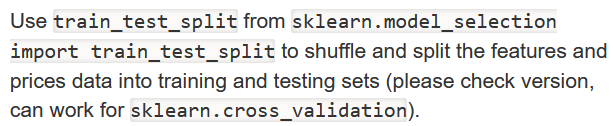

In [34]:
from sklearn.model_selection import train_test_split
#sklearn.cross_validation

* Split the data into 80% training and 20% testing
* Set the random_state for train_test_split to a value of your choice

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

* Check solution

In [36]:
print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))

506
0.7984189723320159
0.2015810276679842


#### Ex.2. Linear regression

* Import the Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

* Fit a model based on X_train and Y_train

In [38]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.7455344405641733

* Predict the X_test and store the prediction values into Y_pred

In [39]:
Y_pred = reg.predict(X_test)

* To visualize the differences between actual prices and predicted values create a scatter plot:

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

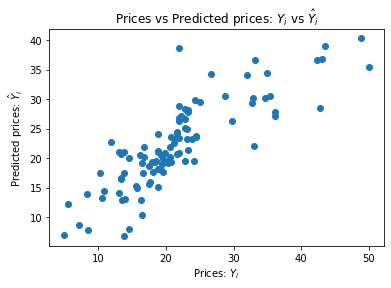

In [40]:
plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

#### Ex.3. To check the level of error of a model calculate the Mean Squared Error.

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
MSE = mean_squared_error(y_test, Y_pred)
print('Mean square error: ', MSE)

Mean square error:  23.81224546508062


#### Ex.4. Calculate the model.score. Check what it is for linear problems.

In [54]:
test = reg.score(X_test, y_test)
train = reg.score(X_train, y_train)
print("Test score: ", test)
print("Train score: ", train)

Test score:  0.6920749038652151
Train score:  0.7455344405641733


* Normalize the data using StandardScaler()
* Generate polynomial features (2nd degree polynomial)
*  Fit and predict a new Linear model with the polynomial features
* Calculate the MSE and model score - compare with regular Linear Regression.


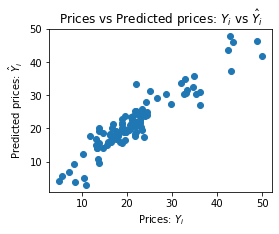

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=2)
scaler = StandardScaler()


X_train_fit = polynomial_features.fit_transform(X_train, y_train)
X_test_fit = polynomial_features.fit_transform(X_test, y_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_fit, y_train)
y_pred_fit = lin_reg.predict(X_test_fit)

plt.figure(figsize=(4, 3))
plt.scatter(y_test, y_pred_fit)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [69]:
MSE = mean_squared_error(y_test, y_pred_fit)
test = lin_reg.score(X_test_fit, y_test)
train = lin_reg.score(X_train_fit, y_train)
print('Mean square error: ', MSE)
print("Test score: ", test)
print("Train score: ", train)

Mean square error:  10.418718228898864
Test score:  0.8652716386222563
Train score:  0.9325110031499102


#### Ex.5. Lasso Regression

In [70]:
from sklearn.linear_model import Ridge, Lasso